In [34]:
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('cardio_train.csv', sep=';', engine='python')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [36]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
df.shape

(70000, 13)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [39]:
#checking the missing values
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [40]:
#changing age from days format to year format
def age_yrs(age):
    ages = age/365
    return ages

In [41]:
df['age'] = df['age'].apply(age_yrs)
df['age'] = df['age'].astype(float).apply(np.ceil)

In [42]:
#converting new age column data type back to interger
df['age']= df['age'].astype(int)
df['age'].head(5)

0    51
1    56
2    52
3    49
4    48
Name: age, dtype: int32

In [43]:
df['gender'] = df['gender'].replace({1 : 0,
                                       2 : 1})

In [44]:
#Renaming some of the column names to proper naming conventions
df.rename(columns = {'ap_hi':'systolic','ap_lo':'diastolic','gluc':'glucose','alco':'alcohol_intake','active':'physical_activity','cardio':'cv_disease'},inplace = True)

In [45]:
df.head()

,id,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol_intake,physical_activity,cv_disease
0,0,51,1,168,62.0,110,80,1,1,0,0,1,0
1,1,56,0,156,85.0,140,90,3,1,0,0,1,1
2,2,52,0,165,64.0,130,70,3,1,0,0,0,1
3,3,49,1,169,82.0,150,100,1,1,0,0,1,1
4,4,48,0,156,56.0,100,60,1,1,0,0,0,0


In [46]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 70000 non-null  int64  
 1   age                70000 non-null  int32  
 2   gender             70000 non-null  int64  
 3   height             70000 non-null  int64  
 4   weight             70000 non-null  float64
 5   systolic           70000 non-null  int64  
 6   diastolic          70000 non-null  int64  
 7   cholesterol        70000 non-null  int64  
 8   glucose            70000 non-null  int64  
 9   smoke              70000 non-null  int64  
 10  alcohol_intake     70000 non-null  int64  
 11  physical_activity  70000 non-null  int64  
 12  cv_disease         70000 non-null  int64  
dtypes: float64(1), int32(1), int64(11)
memory usage: 6.7 MB
None


<AxesSubplot:>

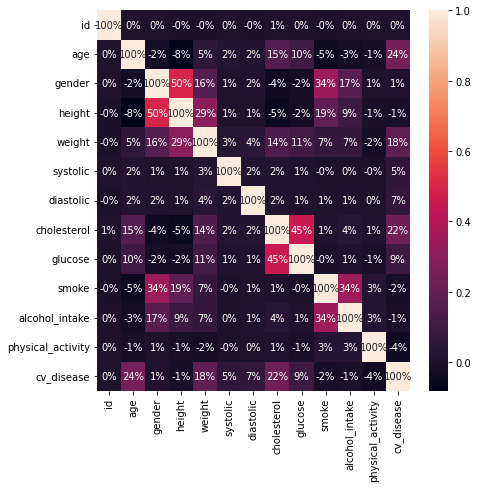

In [47]:
#correlation plot using my new dataframe
plt.figure(figsize=[7,7])
sns.heatmap(df.corr(), annot= True, fmt= '.0%')

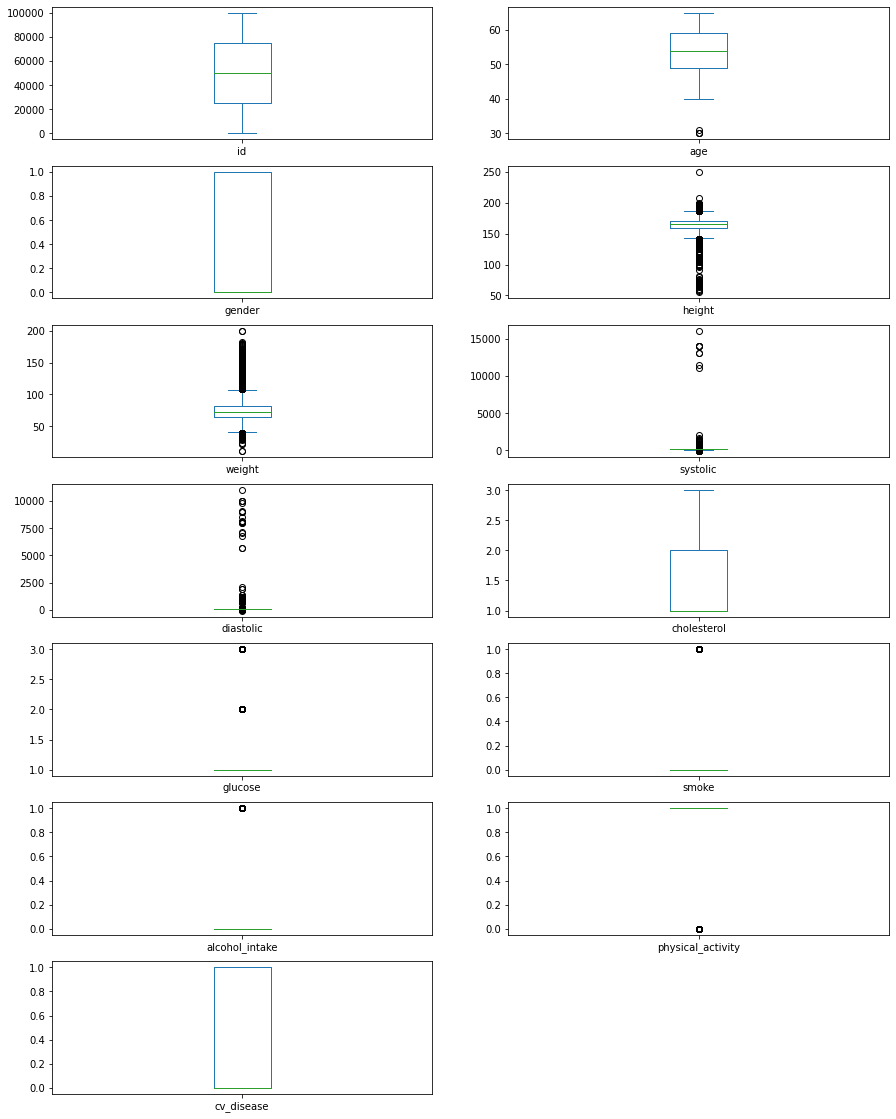

In [48]:
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

In [49]:
df=df.drop(columns=['id'])
X = df.values
X = np.delete(X,11,axis=1)
y = df['cv_disease'].values

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [51]:
X_train.shape,X_test.shape

((49000, 11), (21000, 11))

In [52]:
def model_acc(model):
    model.fit(X_train,y_train)
    acc=model.score(X_test,y_test)
    print(str(model)+ '-->'+str(acc))

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_acc(rf)

from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
model_acc(nb_clf)

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
model_acc(knn_clf)

from sklearn import ensemble
gb_clf = ensemble.GradientBoostingClassifier()
model_acc(gb_clf)

from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
model_acc(lr_clf)

RandomForestClassifier()-->0.7074285714285714
GaussianNB()-->0.5902380952380952
KNeighborsClassifier()-->0.689
GradientBoostingClassifier()-->0.7351428571428571
LogisticRegression()-->0.7077142857142857


C:\Users\ravindue\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
parameters = {'n_estimators':[10, 50,100],'learning_rate':[0.1]}
grid_obj = GridSearchCV(estimator=gb_clf, param_grid=parameters)
grid_fit = grid_obj.fit(X_train,y_train)
best_model = grid_fit.best_estimator_


In [56]:
best_model.score(X_train,y_train)

0.7394081632653061

In [57]:
import pickle
with open('Cadiac.pkl','wb') as file:
    pickle.dump(grid_fit, file)

In [58]:
best_model.predict([[56,0,156,85.0,140,90,3,1,0,0,1]])

array([1], dtype=int64)